# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Python shortcut for importing files, create string & assign to variable 
path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 4/07-2022 Instacart Basket Analysis'

In [3]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 4/07-2022 Instacart Basket Analysis'

In [4]:
# Import final data set from part 1
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_instacart_data.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,#_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.shape

(32404859, 34)

# Analysis

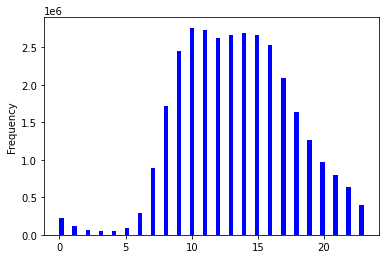

In [7]:
# Create a histogram for hour_of_day_ordered

hist_orders = df['hour_of_day_ordered'].plot.hist(bins = 70, color = 'blue')

As you can see in the histogram above, the most popular time of day to order items would be between 10am and 3pm, especially between 10-11am

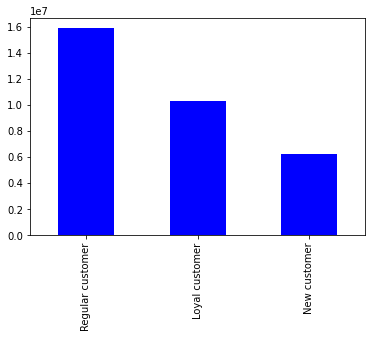

In [8]:
# Create a bar chart for loyalty_flag column
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = 'blue')

The largest category of customers is the "Regular customer" who by criteria has placed between 10-40 orders

In [9]:
#Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
#(Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [ ]:
#store 70% of the sample in df big
big = df[dev]

In [ ]:
#store 30% of the sample in df small
small = df[~dev]

In [ ]:
len(df)

In [ ]:
#check length is correct
len(big) + len(small)

In [ ]:
# Creating new data frame with only columns needed for the line chart
df_small = small[['hour_of_day_ordered','prices']]

In [ ]:
df_small

In [ ]:
# Create line chart of 30% of df sample
line2 = sns.lineplot(data = df_small, x = 'hour_of_day_ordered',y = 'prices')

According to the line plot, the highest priced orders tend to be bought earlier in the morning before 6am. 
There seems to be a decline throughout the rest of the day for high-priced orders except for a slight increase 
around 5pm

In [ ]:
#Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 
#First, determine whether there’s a connection between age and family situation by creating 
#a line chart exploring the connections between age and number of dependents

In [ ]:
#Create new data frame with only the columns needed for the line chart
df_small2 = small[['age','#_of_dependants']]

In [ ]:
df_small2

In [ ]:
line3 = sns.lineplot(data = df_small2, x = 'age', y = '#_of_dependants')

There is no clear trend or relationship between age and # of dependants

In [ ]:
#Explore connection between age and spending power (income)
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)

Observations about the scatter plot:
1. Between the 20-40 year old age group, the typical income is roughly up through 200k
2. After 40+ years old, the average income rises to 200k-300k
3. The group of Instacart buyers with highest spending power is in the 40+ range (rising up to 600k income)
4. There are some customers in both the 20-40 age group and 40+ age group who have higher spending power than the average person in their age group

# Export visualizations

In [ ]:
hist_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders.png'))

In [ ]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [ ]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [ ]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

Note: the first 3 visualizations were already created/exported during exercise 4.9